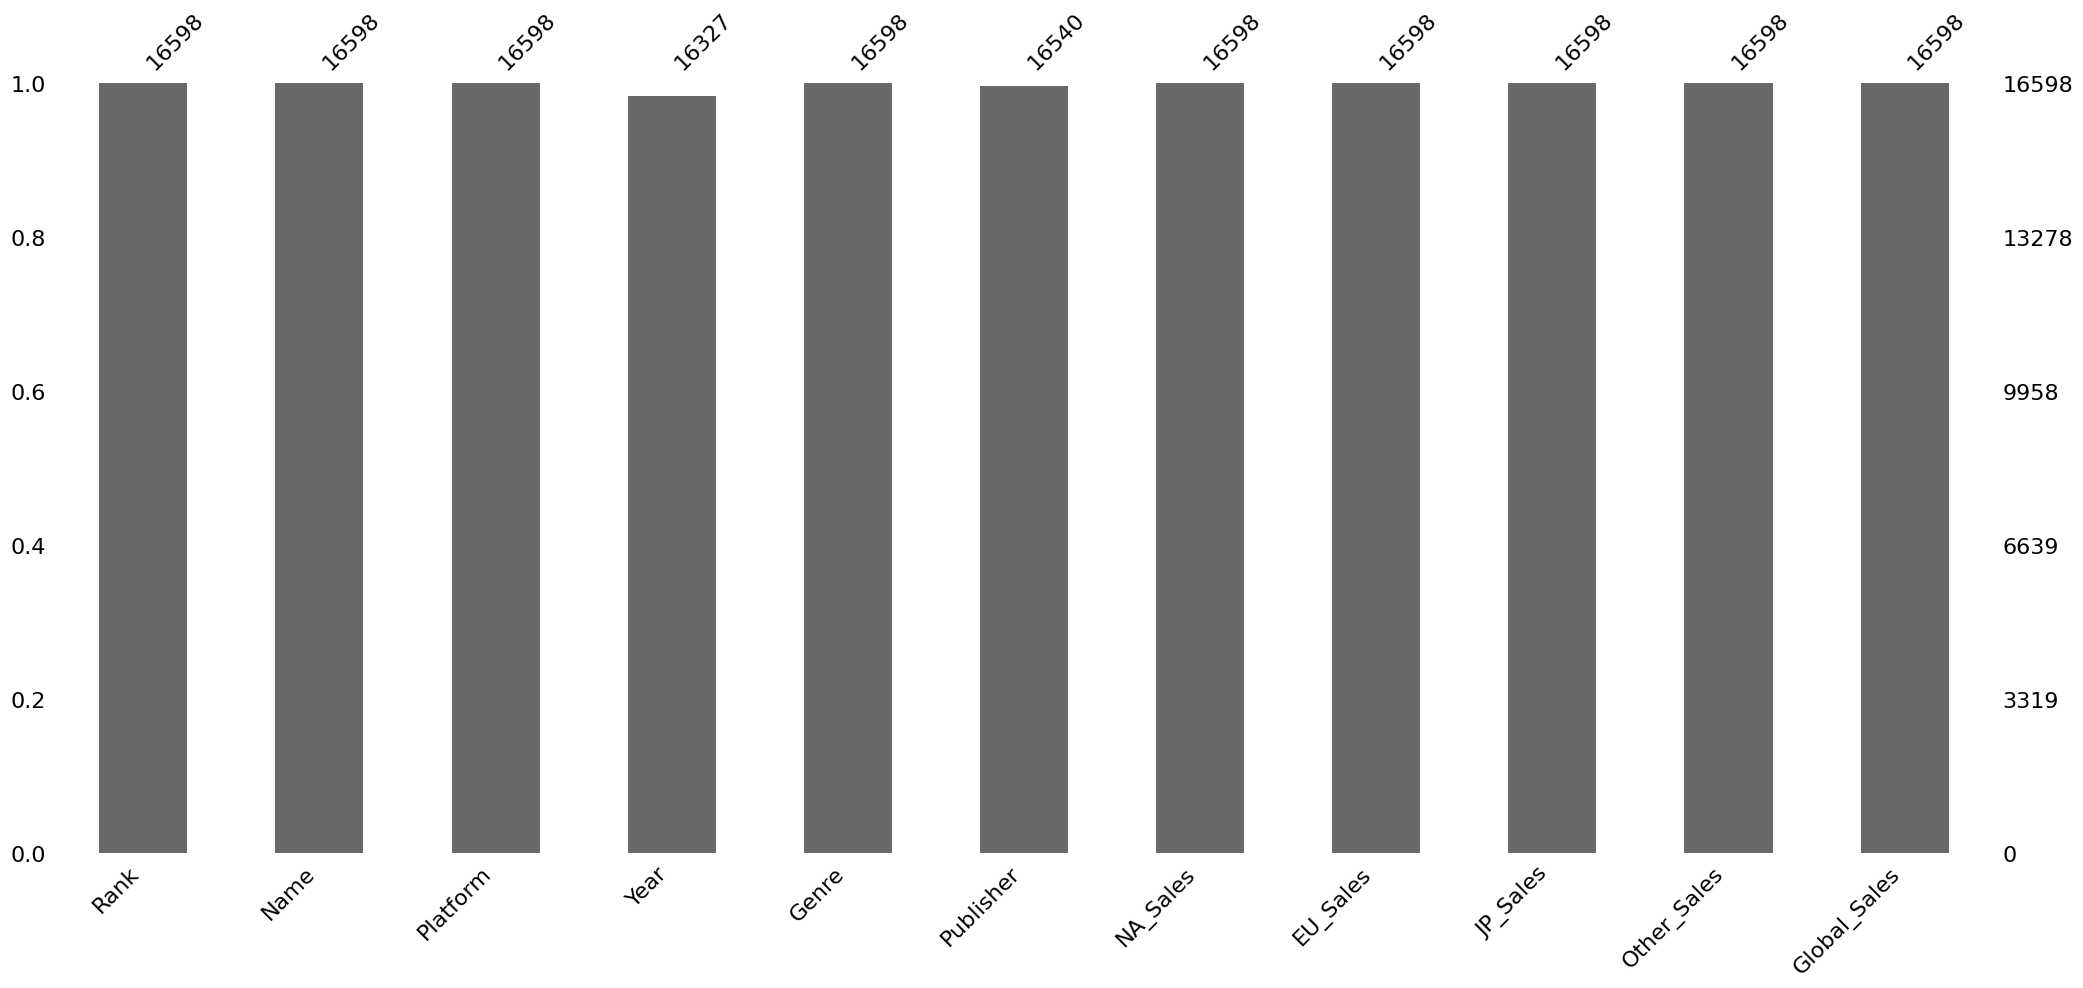

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

import chart_studio.plotly as py  # plotly
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

from wordcloud import WordCloud  # word cloud library

import os
data=pd.read_csv("D:/VideoGameSales/vgsales.csv")
import missingno as msno
msno.bar(data)
plt.show()

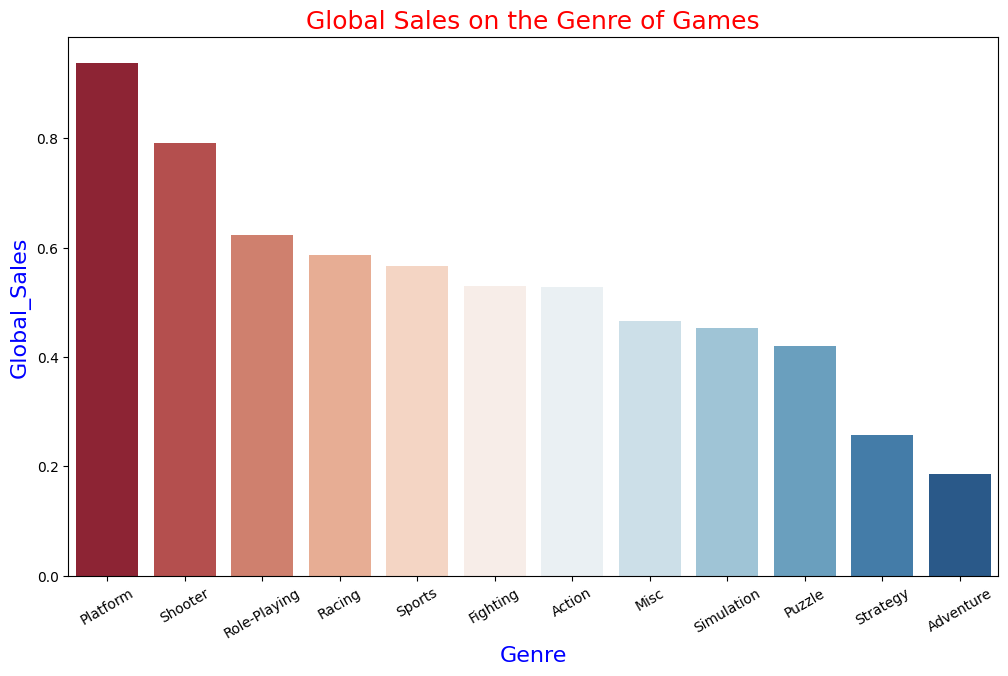

In [2]:
#Bán hàng toàn cầu theo thể loại trò chơi
genre=list(data.Genre.unique())
global_sales=[]
for i in genre:
    val=data[data.Genre==i]
    x=val.Global_Sales.mean()
    global_sales.append(x)
    
d1 = pd.DataFrame({"Genre":genre,"Global_Sales":global_sales})
d1.sort_values("Global_Sales",ascending=False,inplace=True)

#visualization
plt.figure(figsize=(12,7))
sns.barplot(x="Genre", y="Global_Sales", data=d1, palette="RdBu")
#sns.despine(left = True, right = True)
plt.xticks(rotation= 30)
plt.xlabel("Genre", fontsize=16, color="blue")
plt.ylabel("Global_Sales", fontsize=16, color="blue")
plt.title("Global Sales on the Genre of Games", fontsize=18, color="red")
plt.show()

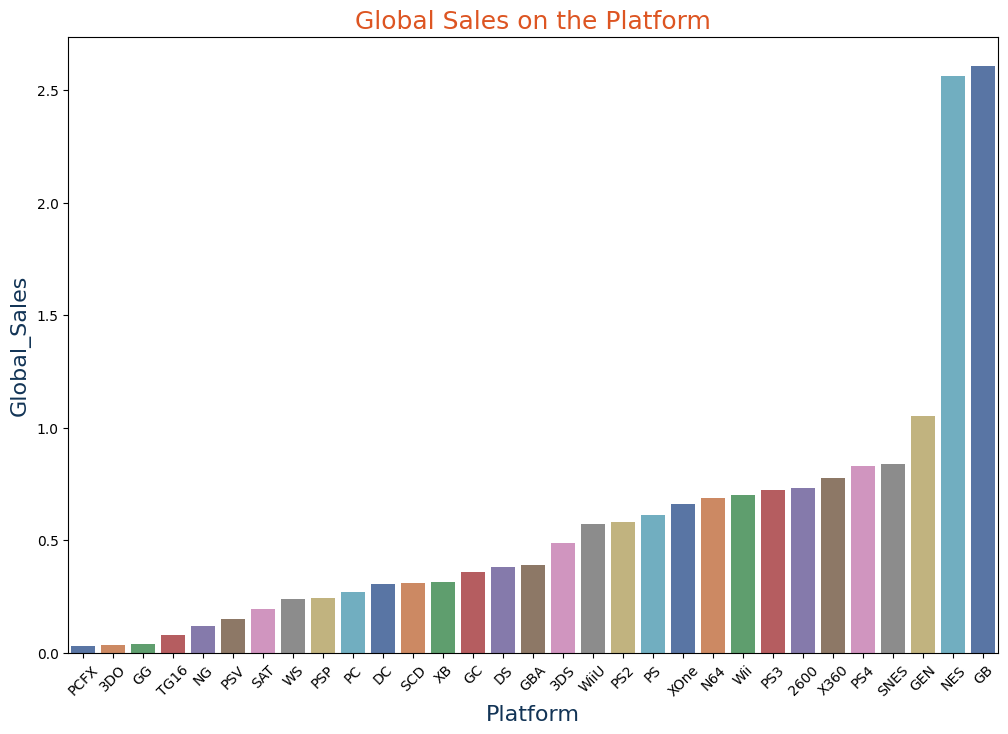

In [3]:
#Chỉ số bán hàng trên toàn cầu theo Platform
platform=list(data.Platform.unique())
global_sales=[]
for i in platform:
    val=data[data.Platform==i]
    x=val.Global_Sales.mean()
    global_sales.append(x)
      
d2=pd.DataFrame({'Platform':platform,'Global_Sales': global_sales})
d2.sort_values("Global_Sales",ascending=True,inplace=True)

#visualization
plt.figure(figsize=(12,8))
sns.barplot(x="Platform", y="Global_Sales", data=d2, palette="deep")
#sns.despine(left = True, right = True)
plt.xticks(rotation= 45)
plt.xlabel("Platform", fontsize=16, color="#123456")
plt.ylabel("Global_Sales", fontsize=16, color="#123456")
plt.title("Global Sales on the Platform", fontsize=18, color="#dd5522")
plt.show()

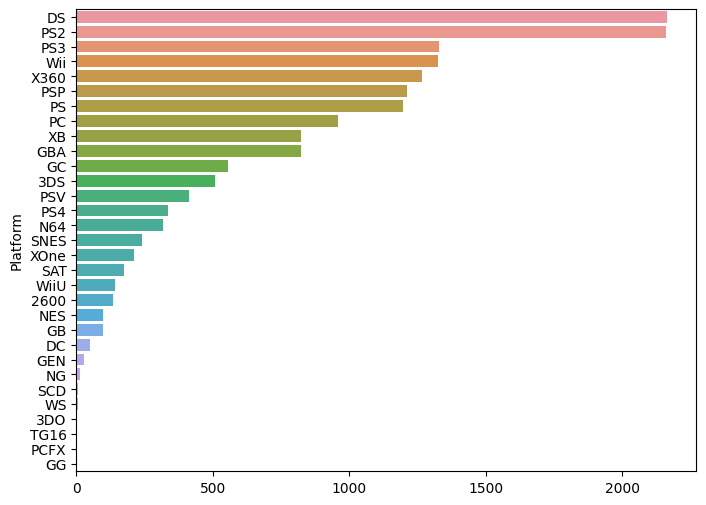

In [4]:
#Số lượng trò chơi đã được bán ra theo Platform 
platGenre = pd.crosstab(data.Platform,data.Genre)
platGenreTotal = platGenre.sum(axis=1).sort_values(ascending = False)
plt.figure(figsize=(8,6))
sns.barplot(y = platGenreTotal.index, x = platGenreTotal.values, orient='h')
plt.ylabel = "Platform"
plt.xlabel = "The amount of games"
plt.show()

[Text(0.5, 0, 'Sales'),
 Text(0, 0.5, 'Genre'),
 Text(0.5, 1.0, 'Rate of Sales  According to Genre of Games')]

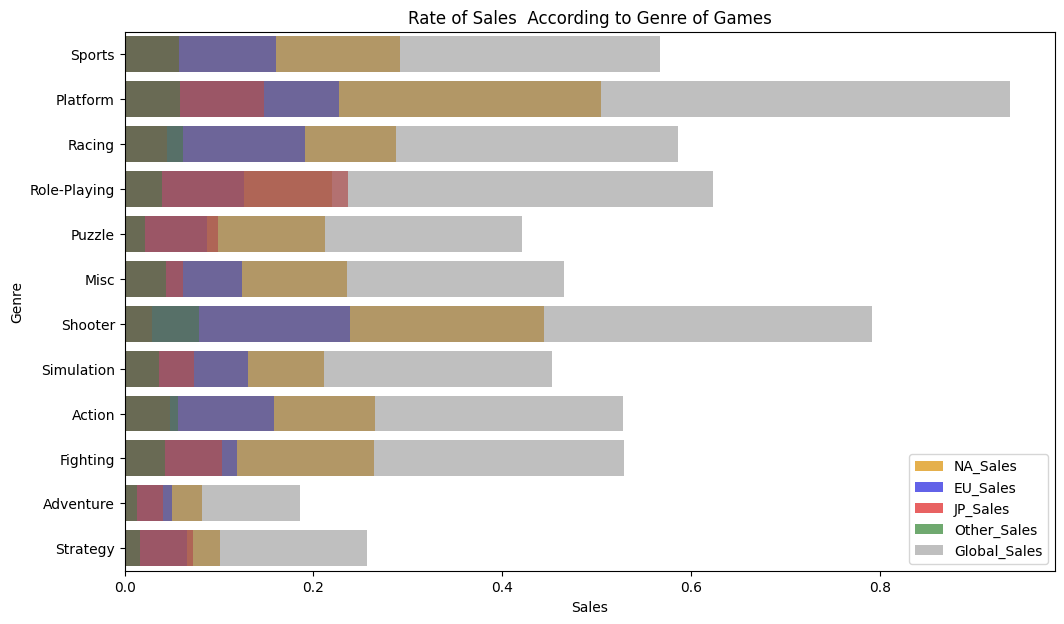

In [5]:
#Tỉ lệ bán hàng theo thể loại trò chơi theo từng khu vực
genre_list=list(data.Genre.unique())
na_sales=[]
eu_sales=[]
jp_sales=[]
other_sales=[]
global_sales=[]
for i in genre_list:
    val=data[data.Genre==i]
    na_sales.append(val.NA_Sales.mean())
    eu_sales.append(val.EU_Sales.mean())
    jp_sales.append(val.JP_Sales.mean())
    other_sales.append(val.Other_Sales.mean())
    global_sales.append(val.Global_Sales.mean())
    
f,ax = plt.subplots(figsize = (12,7))
sns.barplot(x=na_sales,y=genre_list,color='orange',alpha = 0.8,label='NA_Sales' )
sns.barplot(x=eu_sales,y=genre_list,color='blue',alpha = 0.7,label='EU_Sales')
sns.barplot(x=jp_sales,y=genre_list,color='red',alpha = 0.7,label='JP_Sales')
sns.barplot(x=other_sales,y=genre_list,color='green',alpha = 0.6,label='Other_Sales')
sns.barplot(x=global_sales,y=genre_list,color='grey',alpha = 0.5,label='Global_Sales')

ax.legend(loc='lower right',frameon = True)
ax.set(xlabel='Sales', ylabel='Genre',title = "Rate of Sales  According to Genre of Games")

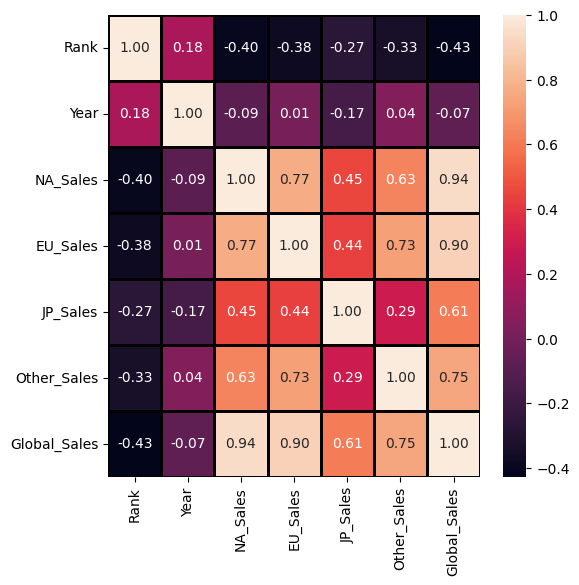

In [6]:
f,ax = plt.subplots(figsize=(6, 6))
sns.heatmap(data.corr(), annot=True, linewidths=.9, linecolor='black', fmt= '.2f',ax=ax)
plt.show()

Text(0.5, 1.0, 'Games According to Genre')

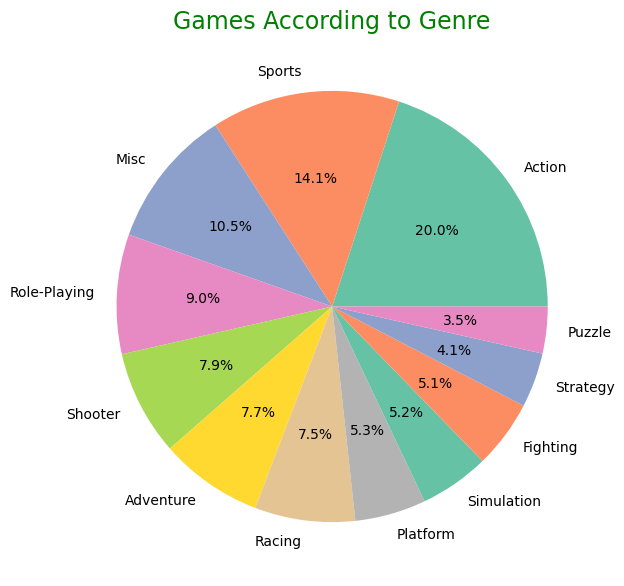

In [7]:
#Thể loại trò chơi theo tỉ lệ
labels=data.Genre.value_counts().index
explode = [0,0,0,0,0,0,0,0,0,0,0,0]
sizes = data.Genre.value_counts().values
# visual
plt.figure(figsize = (7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=sns.color_palette('Set2'), autopct='%1.1f%%')
plt.title('Games According to Genre',fontsize = 17,color = 'green')

In [8]:
#Thứ hạng thế giới của 100 trò chơi video hàng đầu, bán hàng ở Bắc Mỹ và Châu Âu
df=data.loc[:99,:] 

import plotly.graph_objs as go

trace1=go.Scatter(
                x=df.Rank,
                y=df.NA_Sales,
                mode="lines+markers",
                name="North America Sales",
                marker= dict(color = 'rgba(158, 90, 10, 0.7)'),
                text=df.Name)
trace2=go.Scatter(
                x=df.Rank,
                y=df.EU_Sales,
                mode="lines",
                name="Europe Sales",
                marker=dict(color = 'rgba(56, 140, 200, 0.7)'),
                text=df.Name)

edit_df=[trace1,trace2]
layout=dict(title="World rank of the top 100 video games, north america and europe sales .",
            xaxis=dict(title="World Rank",tickwidth=5,ticklen=8,zeroline=False))
fig=dict(data=edit_df,layout=layout)
iplot(fig)

In [9]:
#Các thể loại game theo doanh số trung bình
dataGenre_list=list(data.Genre.unique())
na_sales=[]
eu_sales=[]
jp_sales=[]
other_sales=[]
global_sales=[]
for i in dataGenre_list:
    val=data[data.Genre==i]
    na_sales.append(val.NA_Sales.mean())
    eu_sales.append(val.EU_Sales.mean())
    jp_sales.append(val.JP_Sales.mean())
    other_sales.append(val.Other_Sales.mean())
    global_sales.append(val.Global_Sales.mean())
    
df1=pd.DataFrame({"Genre":dataGenre_list,"NA_Sales":na_sales,"EU_Sales":eu_sales,"JP_Sales":jp_sales,"Other_Sales":other_sales,"Global_Sales":global_sales})

# data visualization
trace1=go.Scatter(
                x=df1.Genre,
                y=df1.NA_Sales,
                mode="lines+markers",
                name="North America Sales",
                marker= dict(color = 'rgba(25, 25, 255, 0.7)'))
trace2=go.Scatter(
                x=df1.Genre,
                y=df1.EU_Sales,
                mode="lines",
                name="Europe Sales",
                marker=dict(color = 'rgba(25, 255, 25, 0.7)'))
trace3=go.Scatter(
                x=df1.Genre,
                y=df1.JP_Sales,
                mode="lines+markers",
                name="Japan Sales",
                marker=dict(color = 'rgba(255, 25, 25, 0.7)'))
trace4=go.Scatter(
                x=df1.Genre,
                y=df1.Other_Sales,
                mode="lines",
                name="Other Sales",
                marker=dict(color = 'rgba(25, 25, 25, 0.7)'))
trace5=go.Scatter(
                x=df1.Genre,
                y=df1.Global_Sales,
                mode="lines+markers",
                name="Global Sales",
                marker=dict(color = 'rgba(250, 150, 0, 0.7)'))
edit_df=[trace1,trace2,trace3,trace4,trace5]
layout=dict(title="The genres according to the average sales",
            xaxis=dict(title="  Genre of Video Games",tickwidth=5,ticklen=8,zeroline=False))
fig=dict(data=edit_df,layout=layout)
plt.savefig('graph.png')
iplot(fig)

<Figure size 640x480 with 0 Axes>

In [10]:
#Doanh số của 4 trò chơi video hàng đầu trong năm 2016
df2016=data[data.Year==2016].iloc[:4,:]

import plotly.graph_objs as go

trace1=go.Bar(
                x=df2016.Name,
                y=df2016.NA_Sales,
                name="NA_Sales",
                marker= dict(color = 'rgba(158, 90, 10, 0.7)',
                            line=dict(color='rgb(0,0,0)',width=1.9)),
               text=df2016.Publisher)
trace2=go.Bar(
                x=df2016.Name,
                y=df2016.EU_Sales,
                name="EU_Sales",
                marker=dict(color = 'rgba(56, 140, 200, 0.7)',
                           line=dict(color='rgb(0,0,0)',width=1.9)),
                text=df2016.Publisher)
trace3=go.Bar(
                x=df2016.Name,
                y=df2016.JP_Sales,
                name="JP_Sales",
                marker=dict(color = 'rgba(156, 30, 130, 0.7)',
                           line=dict(color='rgb(0,0,0)',width=1.9)),
                text=df2016.Publisher)
trace4=go.Bar(
                x=df2016.Name,
                y=df2016.Other_Sales,
                name="Other_Sales",
                marker=dict(color = 'rgba(100, 240,50 , 0.7)',
                           line=dict(color='rgb(0,0,0)',width=1.9)),
                text=df2016.Publisher)

edit_df=[trace1,trace2,trace3,trace4]
layout=go.Layout(barmode="group",title='Sales of the top 4 Video Games in 2016')
fig=dict(data=edit_df,layout=layout)
#fig = go.Figure(data = edit_df, layout = layout)
plt.savefig('graph.png')
iplot(fig)

<Figure size 640x480 with 0 Axes>

In [11]:
#Tỷ lệ trò chơi video bán hàng toàn cầu trong năm 2016
df2016=data[data.Year==2016].iloc[:10,:]
pie_list=list(df2016.Global_Sales)
labels=df2016.Publisher
fig={
    "data":[
        {
            "values":pie_list,
            "labels":labels,
            "domain": {"x": [.2, 1]},
            "name": "Rates of Video Games ",
            "hoverinfo":"label+percent+name",
            "hole": .4,
            "type": "pie"
        },],
    "layout":{
        "title":"Rates of Video Games Global Sales in 2016",
        "annotations":[
            {
                "font":{"size":17},
                "showarrow": False,
                "text": "Video Games",
                "x": 0.75,
                "y": 0.5
            },
        ]
    }  
}
iplot(fig)

In [12]:
#Thứ hạng thế giới của 100 trò chơi video hàng đầu, doanh số bán hàng của Nhật Bản và bán hàng châu Âu.
dframe=data.iloc[:100,:]
trace0=go.Scatter(
    x=dframe.Rank,
    y=dframe.JP_Sales,
    name = "Japan Sales",
    marker = dict(color = 'rgba(56, 182, 32, 0.8)'),
)
trace1=go.Scatter(
    x=dframe.Rank,
    y=dframe.EU_Sales,
    xaxis='x2',
    yaxis='y2',
    name = "Europe Sales",
     marker = dict(color = 'rgba(196, 20, 92, 0.8)'),
)
edit_data=[trace0,trace1]
layout = go.Layout(
    xaxis2=dict(
        domain=[0.5, 0.95],
        anchor='y2',        
    ),
    yaxis2=dict(
        domain=[0.5, 0.95],
        anchor='x2',
    ),
    title = ' World rank of the top 100 video games, japan sales and europe sales.'
)
fig = go.Figure(data=edit_data, layout=layout)
iplot(fig)

In [13]:
trace1=go.Scatter3d(
    x=dframe.Rank,
    y=dframe.EU_Sales,
    z=dframe.JP_Sales,
    mode='markers',
    marker=dict(
        size=12,
        #color='rgb(135,25,25)',
        color=dframe.Rank,                # set color to an array/list of desired values
        colorscale='Viridis',             # choose a colorscale
        opacity=0.9
    )
)
edit_data=[trace1]
layout=go.Layout(
     margin=dict(
        l=1,
        r=1,
        b=1,
        t=1  
    )
)
fig=go.Figure(data=edit_data,layout=layout)
iplot(fig)

TypeError: 'str' object is not callable

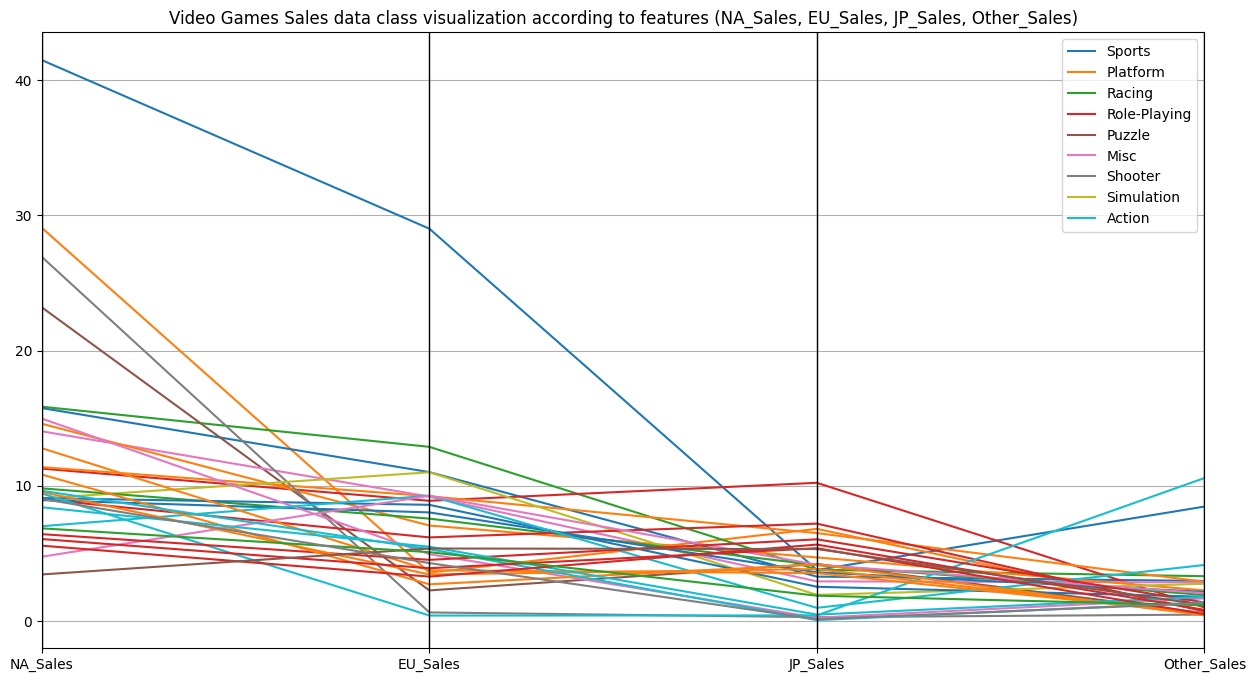

In [14]:
#Thứ hạng thế giới của 30 trò chơi video hàng đầu Trực quan hóa dữ liệu bán hàng theo tính năng
from pandas.plotting import parallel_coordinates

df=data.drop(['Rank','Name','Year','Platform','Publisher','Global_Sales'],axis=1)

plt.figure(figsize=(15,8))
parallel_coordinates(df.head(30), 'Genre', colormap=plt.get_cmap("tab10"))
plt.title("Video Games Sales data class visualization according to features (NA_Sales, EU_Sales, JP_Sales, Other_Sales)")
plt.xlabel("Features of data set")
plt.ylabel("sales")
plt.show()

TypeError: 'str' object is not callable

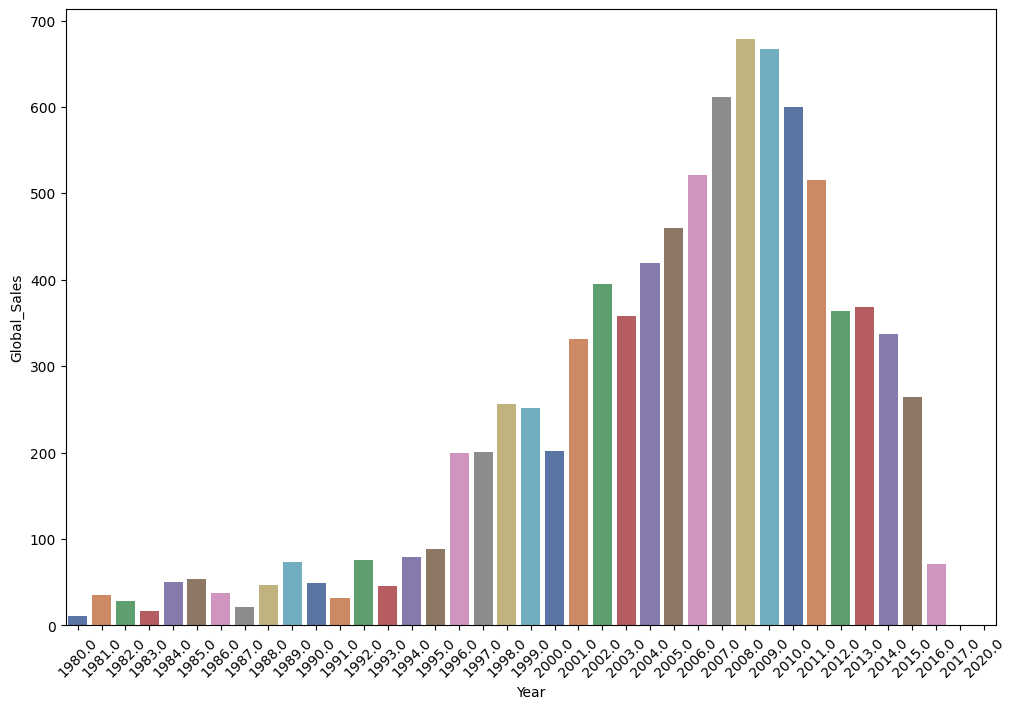

In [ ]:
#Tổng doanh thu theo từng năm
year=list(data.Year.unique())
global_sales=[]
for i in year:
    int=data[data.Year==i]
    x=int.Global_Sales.sum()
    global_sales.append(x)
      
d2=pd.DataFrame({'Year':year,'Global_Sales': global_sales})
d2.sort_values("Global_Sales",ascending=True,inplace=True)

#visualization
plt.figure(figsize=(12,8))
sns.barplot(x="Year", y="Global_Sales", data=d2, palette="deep")
#sns.despine(left = True, right = True)
plt.xticks(rotation= 45)
plt.xlabel("Year", fontsize=16, color="#123456")
plt.ylabel("Global_Sales", fontsize=16, color="#123456")

plt.show()